In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_excel('BankruptcyPrevention.xlsx')
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [5]:
data.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [7]:
data[data.duplicated()].shape

(147, 7)

In [8]:
data.drop_duplicates(inplace=True)
## removed the duplicated

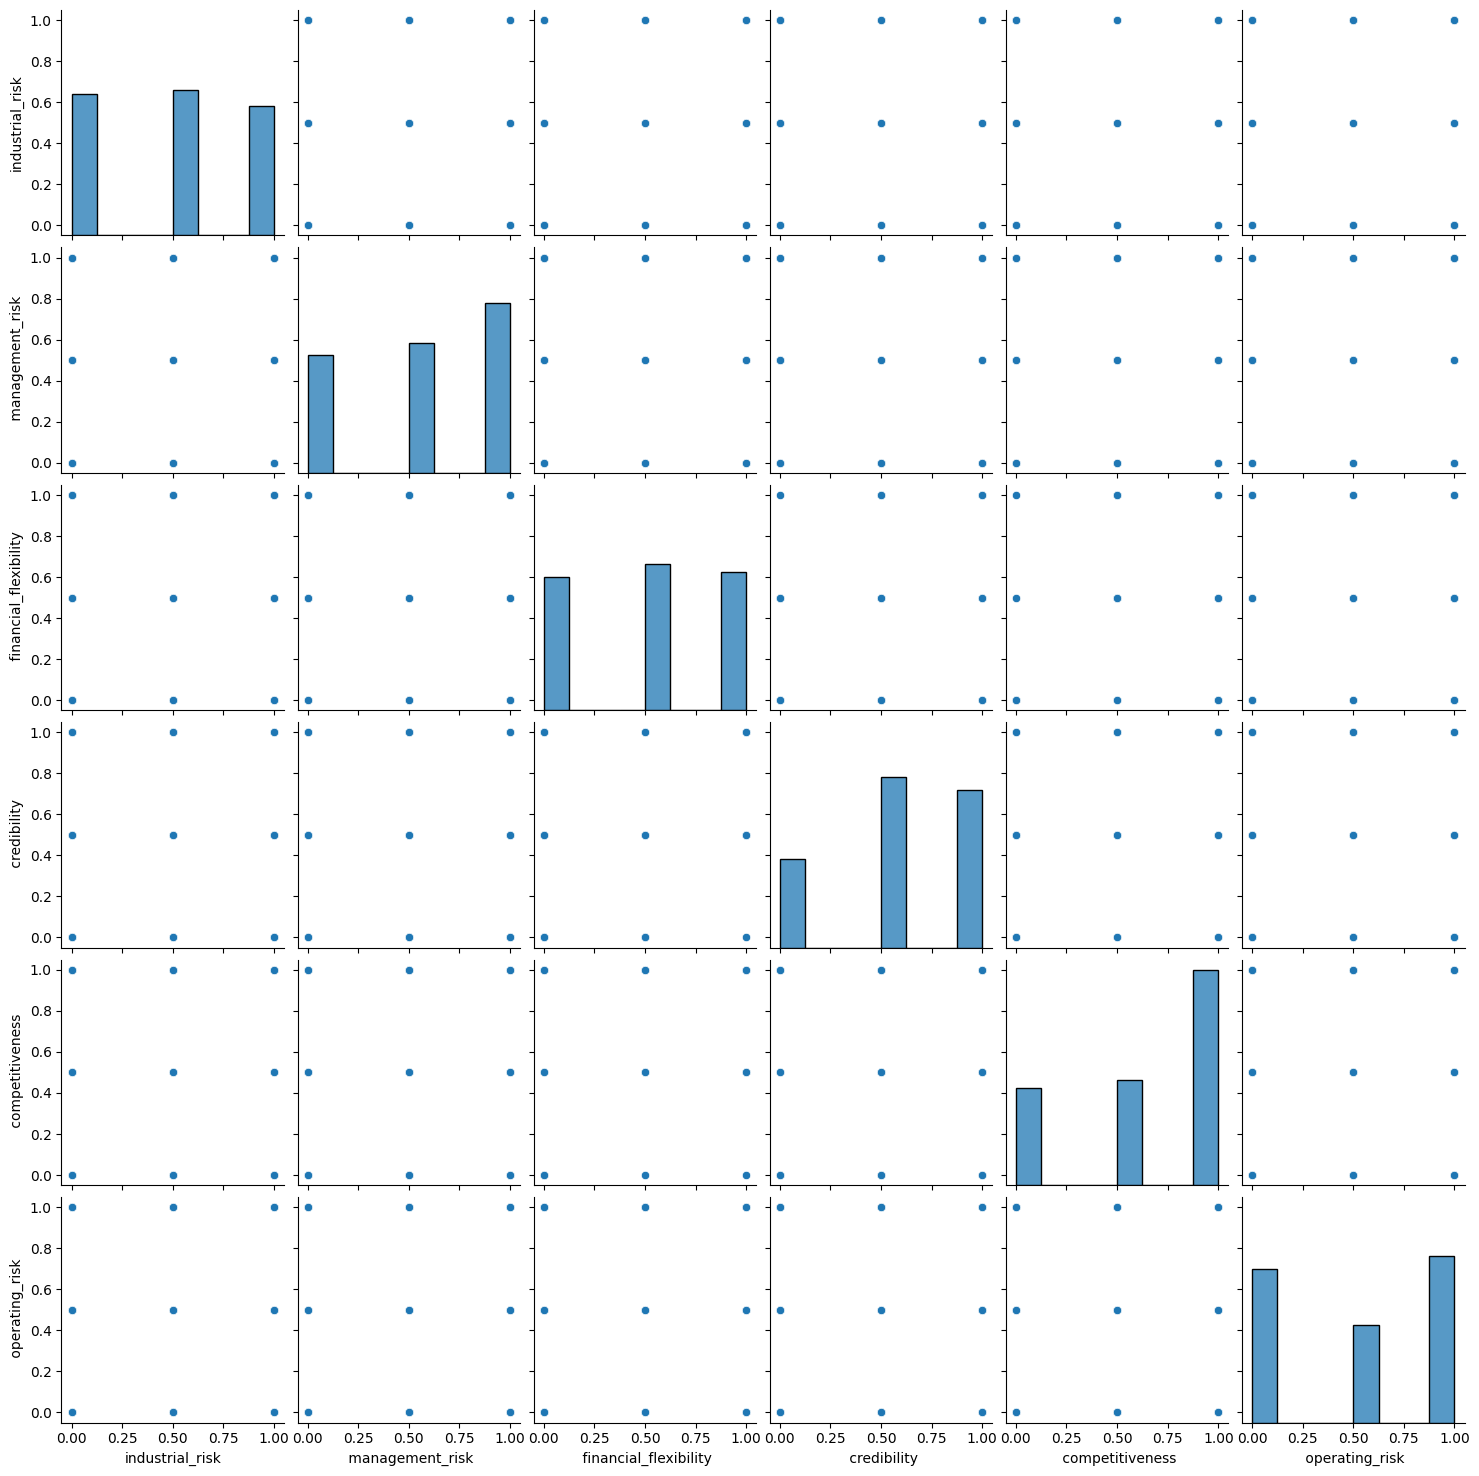

In [9]:
#print(data.corr())
sns.pairplot(data)

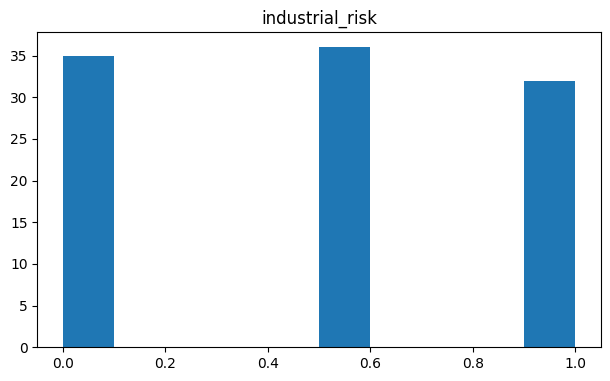

In [10]:
%matplotlib inline
plt.subplots(figsize = (16,9))
plt.subplot(221)
plt.hist(data['industrial_risk'], bins =10)
plt.title('industrial_risk')
plt.show()

In [11]:
data.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [12]:
from sklearn.preprocessing import LabelEncoder    
label=LabelEncoder()
data[' class']=label.fit_transform(data[' class'])
data.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X=data.drop(' class', axis=1)
Y=data[' class']
modelLR=LogisticRegression()

In [14]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.3, random_state=42)

In [15]:
modelLR.fit(X_train, Y_train)
pred_train=modelLR.predict(X_train)
pred_test=modelLR.predict(X_test)

In [16]:
modelLR.coef_

array([[-0.73714199, -0.1384174 ,  1.42683178,  1.32956032,  2.82343333,
        -0.40290738]])

In [17]:
modelLR.intercept_

array([-0.75767104])

In [18]:
scoreLR_train=modelLR.score(X_train, Y_train)
scoreLR_train

0.9861111111111112

In [19]:
scoreLR_test=modelLR.score(X_test, Y_test)
scoreLR_test

0.967741935483871

In [20]:
acc_train=np.mean(Y_train==pred_train)
acc_train

0.9861111111111112

In [21]:
acc_test=np.mean(Y_test==pred_test)
acc_test

0.967741935483871

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
print(classification_report(Y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.96      1.00      0.98        23

    accuracy                           0.97        31
   macro avg       0.98      0.94      0.96        31
weighted avg       0.97      0.97      0.97        31



In [23]:
confusion_matrix(Y_test, pred_test)

array([[ 7,  1],
       [ 0, 23]], dtype=int64)

In [24]:
df=pd.DataFrame({'Y_test': Y_test, 'Pred_test': pred_test})
df.head(2)

,Y_test,Pred_test
112,1,1
150,1,1


In [25]:
print(len(df[(df['Y_test']==0) & (df['Pred_test']==0)])  )   #TN

7


In [26]:
print(len(df[(df['Y_test']==0) & (df['Pred_test']==1)]))        #FP
print(len(df[(df['Y_test']==1) & (df['Pred_test']==0)]))    #FN
print(len(df[(df['Y_test']==1) & (df['Pred_test']==1)]))    #TP

1
0
23


In [27]:
aucLR=roc_auc_score(Y_test, pred_test)
aucLR

0.9375

KNN

In [28]:
#hyper parameter tuning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
modelKNN=KNeighborsClassifier()
n_neighbors=np.array(range(1,50))
param_grid=dict(n_neighbors=n_neighbors)
grid=GridSearchCV(estimator=modelKNN, param_grid=param_grid)
grid.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [29]:
grid.best_params_

{'n_neighbors': 8}

In [30]:
grid.best_score_

1.0

In [31]:
modelKNN=KNeighborsClassifier(n_neighbors=3)     #when n_neighbors=1 the score was 100%
modelKNN.fit(X_train, Y_train)
score_KNN_train=modelKNN.score(X_train, Y_train)
score_KNN_train

0.9861111111111112

In [32]:
score_KNN_test=modelKNN.score(X_test, Y_test)
score_KNN_test

1.0

In [33]:
pred_train=modelKNN.predict(X_train)
pred_test=modelKNN.predict(X_test)
train_acc=np.mean(Y_train==pred_train)
test_acc=np.mean(Y_test==pred_test)
print('train accuracy: ', train_acc)
print('Test accuracy : ', test_acc)

train accuracy:  0.9861111111111112
Test accuracy :  1.0


In [34]:
print(classification_report(Y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        23

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



In [35]:
confusion_matrix(Y_test, pred_test)

array([[ 8,  0],
       [ 0, 23]], dtype=int64)

In [36]:
#model validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
modelKNN=KNeighborsClassifier(n_neighbors=1)
KF=KFold(n_splits=10)
results=cross_val_score(modelKNN, X_train, Y_train, cv=KF)
results.mean()*100

98.57142857142858

In [37]:
res=[]
for i in range(1,11):
    modelK=KNeighborsClassifier(n_neighbors=i)
    KF=KFold(n_splits=10)
    results=cross_val_score(modelK, X_train, Y_train, cv=KF)
    res.append(results.mean())
print(res)

[0.9857142857142858, 0.9714285714285715, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858, 0.9714285714285715, 0.9857142857142858, 0.9857142857142858, 0.9857142857142858]


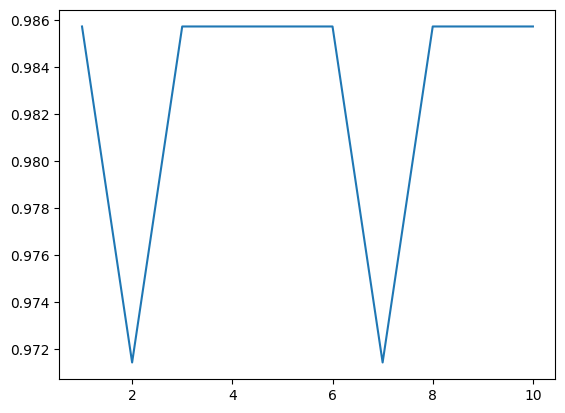

In [38]:
plt.plot(range(1,11), res)

In [39]:
# #visualising the result
# acc=[]
# for i in range(1,50):
#     modelKNN=KNeighborsClassifier(n_neighbors=i)
#     modelKNN.fit(X_train, Y_train)
#     train_acc=np.mean(Y_train==modelKNN.predict(X_train))
#     test_acc=np.mean(Y_test==modelKNN.predict(X_test))
#     acc.append([train_acc, test_acc])

# plt.figure(figsize=(12,6))
# plt.plot(range(1,50), [i[0] for i in acc])
# plt.plot(range(1,50), [i[1] for i in acc])
# plt.legend(['train','test'])
# plt.xticks(range(1,50))
# plt.show()
# # when n_neighbors=1, obtained by gridseatchcv, the test accuracy was 100, whereas train accuracy aws 96.7% 
# #but from the below plot both train and test accuracy almost equal to 100 when n_neighbors=1 or 2

In [40]:
# when n_neighbors=2
modelKNN=KNeighborsClassifier(n_neighbors=2)
modelKNN.fit(X_train, Y_train)
print('train accuracy :', modelKNN.score(X_train, Y_train))
print('test accuracy : ',modelKNN.score(X_test, Y_test))

train accuracy : 1.0
test accuracy :  1.0


In [42]:
#DECISION TREE

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
criterion=['entropy', 'gini']
max_depth=range(1,10)
param_grid=dict(criterion=criterion, max_depth=max_depth)
modelDT=DecisionTreeClassifier()
grid=GridSearchCV(estimator=modelDT, param_grid=param_grid)
grid.fit(X_train, Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10)})

In [44]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'max_depth': 1}
1.0


In [45]:
modelDT=DecisionTreeClassifier(criterion='entropy', max_depth=1)   
modelDT.fit(X_train, Y_train)
score_DT_train=modelDT.score(X_train, Y_train)
score_DT_train

1.0

In [46]:
score_DT_test=modelDT.score(X_test, Y_test)
score_DT_test

0.967741935483871

In [47]:
modelDT.feature_importances_ 

array([0., 0., 0., 0., 1., 0.])

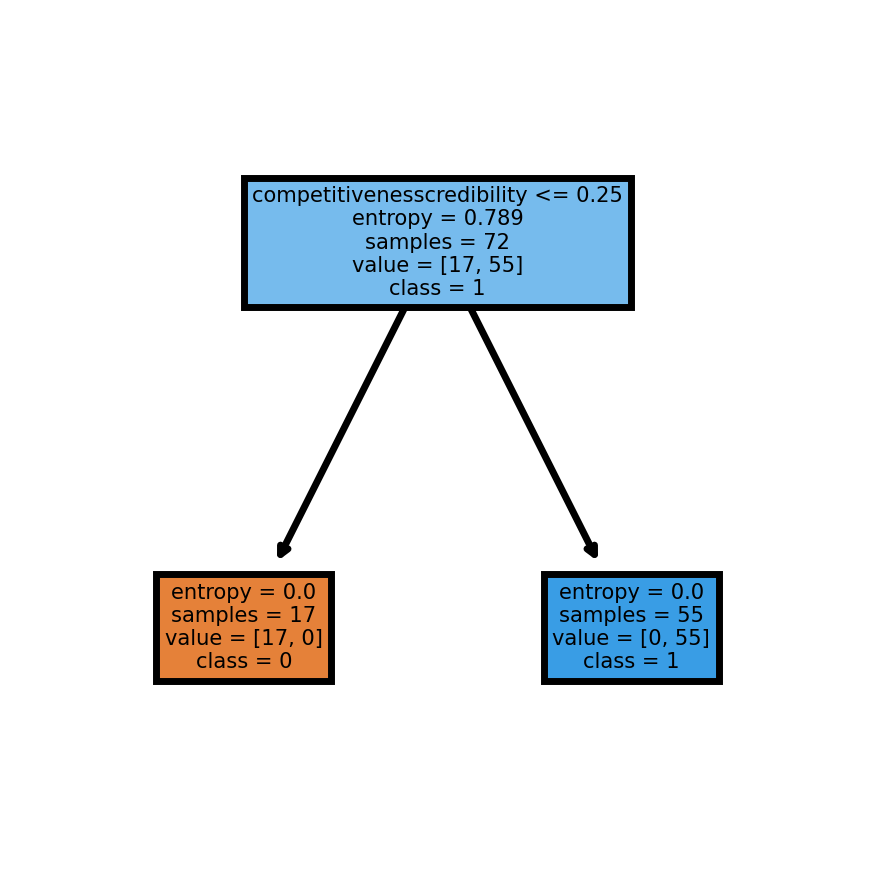

In [48]:
fn=['industrial_risk', ' management_risk', ' financial_flexibility',
       ' operating_risk', 'competitiveness' 'credibility']
cn=['0','1']
from sklearn import tree
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(2,2), dpi=500)
tree.plot_tree(modelDT, feature_names=fn, class_names=cn, filled=True)
plt.show()

In [49]:
#model validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
KF=KFold(n_splits=10)
modelDT=DecisionTreeClassifier(max_depth=3, criterion='entropy')
results=cross_val_score(modelDT, X_train, Y_train, cv=KF)
results.mean()*100


100.0

In [50]:
#RANDOM FOREST

In [51]:
from sklearn.ensemble import RandomForestClassifier
max_features=range(1,6)
criterion=['entropy', 'gini']
max_depth=range(1,10)
param_grid=dict(max_features=max_features, criterion=criterion, max_depth=max_depth)
modelRF=RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
grid=GridSearchCV(estimator=modelRF, param_grid=param_grid)
grid.fit(X_train, Y_train)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 1, 'max_features': 3}

In [52]:
grid.best_score_

1.0

In [53]:
modelRF=RandomForestClassifier(criterion='entropy', max_features=2,max_depth=1, n_estimators=100, oob_score=True, random_state=42)



In [54]:
print(modelRF.fit(X_train, Y_train))
print(modelRF.score(X_test, Y_test))
print(modelRF.oob_score_)

RandomForestClassifier(criterion='entropy', max_depth=1, max_features=2,
                       oob_score=True, random_state=42)
0.967741935483871
0.9861111111111112


In [55]:
pred_train=modelRF.predict(X_train)
pred_test=modelRF.predict(X_test)
acc_RF_train=np.mean(Y_train==pred_train)
acc_RF_test=np.mean(Y_test==pred_test)

In [56]:
print(acc_RF_train)
print(acc_RF_test)

0.9861111111111112
0.967741935483871


In [57]:
#SUPPORT VECTOR MACHINES

In [58]:
from sklearn.svm import SVC
kernel=['linear','poly','rbf','sigmoid']
param_grid=dict(kernel=kernel)
modelSM=SVC()
grid=GridSearchCV(estimator=modelSM, param_grid=param_grid)
grid.fit(X_train, Y_train)
grid.best_params_

{'kernel': 'linear'}

In [59]:
grid.best_score_

0.9866666666666667

In [60]:
modelSM=SVC(kernel='rbf', probability=True)
modelSM.fit(X_train, Y_train)

SVC(probability=True)

In [61]:
acc_trainSM=modelSM.score(X_train, Y_train)
acc_testSM=modelSM.score(X_test, Y_test)

In [62]:
print(acc_trainSM)
print(acc_testSM)

1.0
0.967741935483871


In [63]:
df_result=pd.DataFrame({'Model': ['Logistic Regression','KNN', 'Decision Tree','Random Forest','SVC'], 'Train_acc':[scoreLR_train,score_KNN_train, 
                 score_DT_train,acc_RF_train, acc_trainSM], 'Test_acc':[scoreLR_test,score_KNN_test,score_DT_test,acc_RF_test, acc_testSM]})

In [64]:
df_result

,Model,Train_acc,Test_acc
0,Logistic Regression,0.986111,0.967742
1,KNN,0.986111,1.000000
2,Decision Tree,1.000000,0.967742
3,Random Forest,0.986111,0.967742
4,SVC,1.000000,0.967742


In [65]:
print('done')

done


In [67]:
import pickle
filename = 'bankruptcydata.sav'
pickle.dump(modelLR,open(filename,'wb'))

In [69]:
load_model = pickle.load(open(filename,'rb'))
X_train

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
12,0.5,1.0,0.0,0.0,0.0,1.0
192,0.5,1.0,0.0,0.0,1.0,0.0
138,1.0,1.0,0.5,1.0,1.0,0.0
110,0.0,0.0,1.0,1.0,1.0,0.0
147,0.5,0.5,0.5,0.5,1.0,1.0
...,...,...,...,...,...,...
154,0.5,0.0,1.0,1.0,1.0,1.0
19,0.0,0.5,0.0,0.0,0.0,0.5
179,0.0,0.5,1.0,0.5,1.0,0.0
134,0.0,1.0,0.5,0.5,0.5,1.0


In [73]:
load_model.predict([[0.0,0.0,1.0,1.0,1.0,0.0]])

array([1])